In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('/content/drive/MyDrive/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/movies_test.csv')

# 데이터 전처리

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


In [ ]:
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6.627000e+03
다큐멘터리,6.717226e+04
서스펜스,8.261100e+04
애니메이션,1.819267e+05
멜로/로맨스,4.259680e+05
미스터리,5.275482e+05
공포,5.908325e+05
드라마,6.256898e+05
코미디,1.193914e+06


In [ ]:
train['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [ ]:
gerne_score = []
for i in train['genre']:
    if (i == '뮤지컬'):
        gerne_score.append(1)
    elif (i == '다큐멘터리'):
        gerne_score.append(2)
    elif (i == '서스펜스'):
        gerne_score.append(3)
    elif (i == '애니메이션'):
        gerne_score.append(4)
    elif (i == '멜로/로맨스'):
        gerne_score.append(5)
    elif (i == '미스터리'):
        gerne_score.append(6)
    elif (i == '공포'):
        gerne_score.append(7)
    elif (i == '드라마'):
        gerne_score.append(8)
    elif (i == '코미디'):
        gerne_score.append(9)
    elif (i == 'SF'):
        gerne_score.append(10)
    elif (i == '액션'):
        gerne_score.append(11)
    elif (i == '느와르'):
        gerne_score.append(12)

train['gerne_score'] = gerne_score

gerne_score = []
for i in test['genre']:
    if (i == '뮤지컬'):
        gerne_score.append(1)
    elif (i == '다큐멘터리'):
        gerne_score.append(2)
    elif (i == '서스펜스'):
        gerne_score.append(3)
    elif (i == '애니메이션'):
        gerne_score.append(4)
    elif (i == '멜로/로맨스'):
        gerne_score.append(5)
    elif (i == '미스터리'):
        gerne_score.append(6)
    elif (i == '공포'):
        gerne_score.append(7)
    elif (i == '드라마'):
        gerne_score.append(8)
    elif (i == '코미디'):
        gerne_score.append(9)
    elif (i == 'SF'):
        gerne_score.append(10)
    elif (i == '액션'):
        gerne_score.append(11)
    elif (i == '느와르'):
        gerne_score.append(12)

test['genre_score'] = gerne_score

test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,genre_score
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,12
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3,5
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7,8
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2,11
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1,7


In [ ]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'], axis = 1)
test =  test.drop(['dir_prev_bfnum'], axis = 1)

In [ ]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'], axis = 1)
test = test.drop(['director'], axis = 1)

In [ ]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'], axis= 1)
test = test.drop(['title'], axis= 1)

In [ ]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [ ]:
train = train.drop(['release_time'], axis= 1)
test = test.drop(['release_time'], axis= 1)

In [ ]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 모델 생성 및 예측(과제부분)

In [ ]:
train_x = train.drop(['box_off_num'], axis= 1)
train_y = train['box_off_num']
train_x.head()

,time,dir_prev_num,num_staff,num_actor,gerne_score,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,distributor_(주)쇼박스,distributor_CJ 엔터테인먼트,distributor_기타,...,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가
0,96,0,91,2,11,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,130,2,387,3,12,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,123,4,343,4,11,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,101,2,20,6,9,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,108,1,251,2,9,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits = 5, shuffle=True)

In [ ]:
model = RandomForestRegressor()

models = []
for train_idx, val_idx in k_fold.split(train_x):
    x_t = train_x.iloc[train_idx]
    y_t = train_y.iloc[train_idx]
    models.append(model.fit(x_t, y_t))

In [ ]:
preds = []
for model in models:
    preds.append(model.predict(test))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genre_score
Feature names seen at fit time, yet now missing:
- gerne_score

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genre_score
Feature names seen at fit time, yet now missing:
- gerne_score

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- genre_score
Feature names seen at fit time, yet now missing:
- gerne_score

  warnings.warn(mess

# 제출

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/submission.csv')
submission

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0
...,...,...
238,해에게서 소년에게,0
239,울보 권투부,0
240,어떤살인,0
241,말하지 못한 비밀,0


In [ ]:
import numpy as np
submission['box_off_num'] = np.mean(preds, axis = 0)

In [ ]:
submission

,title,box_off_num
0,용서는 없다,2865952.27
1,아빠가 여자를 좋아해,2156137.26
2,하모니,1564903.46
3,의형제,1463979.87
4,평행 이론,1279698.75
...,...,...
238,해에게서 소년에게,145121.13
239,울보 권투부,2855.84
240,어떤살인,266587.59
241,말하지 못한 비밀,6370.08


In [ ]:
submission.to_csv('/content/drive/MyDrive/베이스라인.csv', index = False)

# 제출 점수(과제부분)

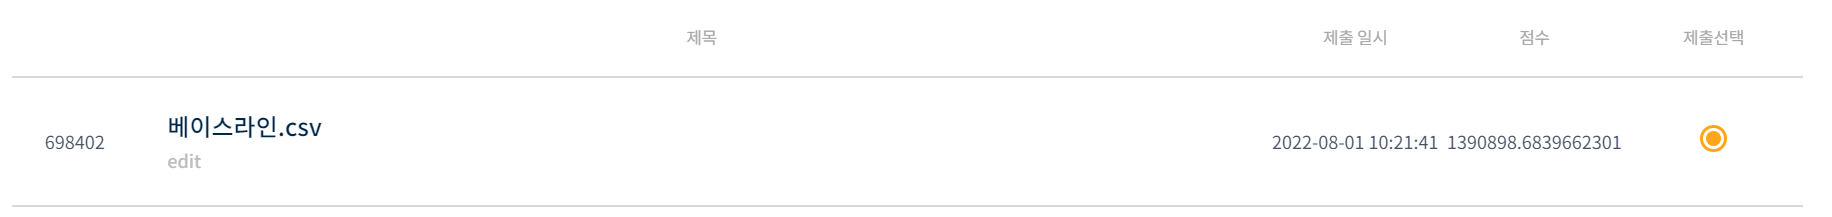